Name: Rishabh Singhvi,
Sap ID: 60009210206,
Branch: CSE Ds,
Batch: D22

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import random

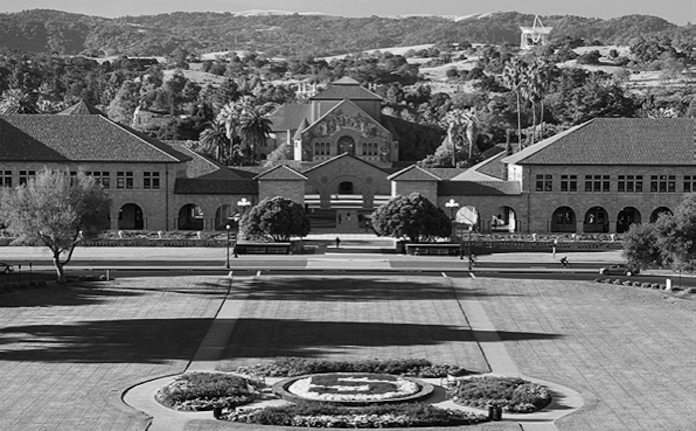

In [2]:
img = cv2.imread('/content/Stanford696.jpg',0)
cv2_imshow(img)

**Adding Gaussian noise**

In [3]:
row,col = img.shape

In [4]:
gauss_noise=np.zeros((row,col),dtype=np.uint8)
cv2.randn(gauss_noise,128,20)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

In [5]:
gn_img=cv2.add(img,gauss_noise)

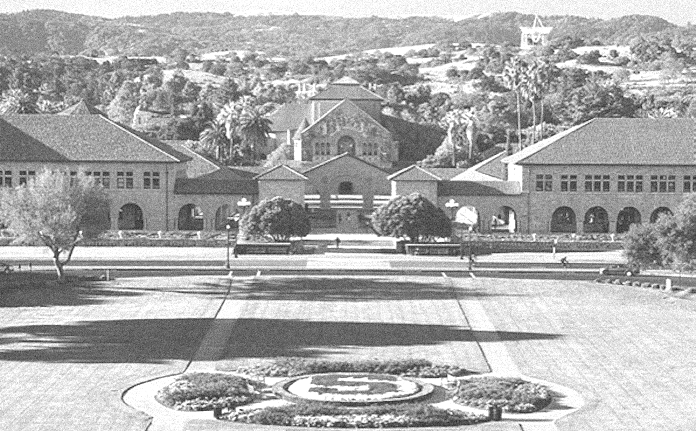

In [6]:
cv2_imshow(gn_img)

**Average Filtering**

In [7]:
row,col=gn_img.shape

In [8]:
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

In [9]:
mask

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [10]:
img_new = np.zeros([row, col])

In [11]:
for i in range(1, row-1):
    for j in range(1, col-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
        img_new[i, j]= temp

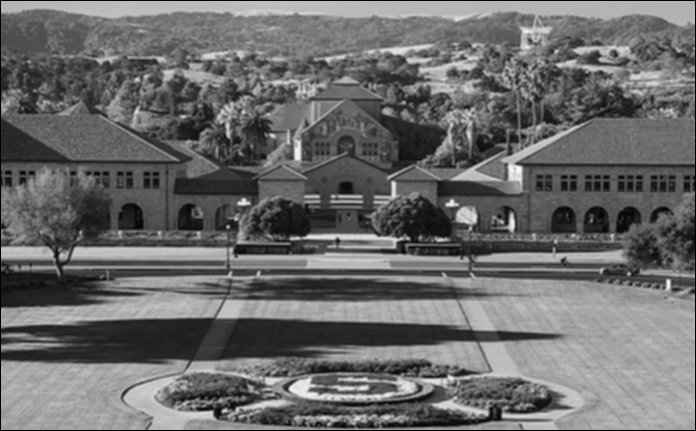

In [12]:
cv2_imshow(img_new)

**Add salt and pepper noise**

In [13]:
def add_noise(img):
    row , col = img.shape
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)

        img[y_coord][x_coord] = 255

    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):

        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)

        img[y_coord][x_coord] = 0

    return img

In [14]:
cv2.imwrite('salt&pepper.jpg',add_noise(img))

True

In [15]:
salt_pepper = cv2.imread('/content/salt&pepper.jpg',0)

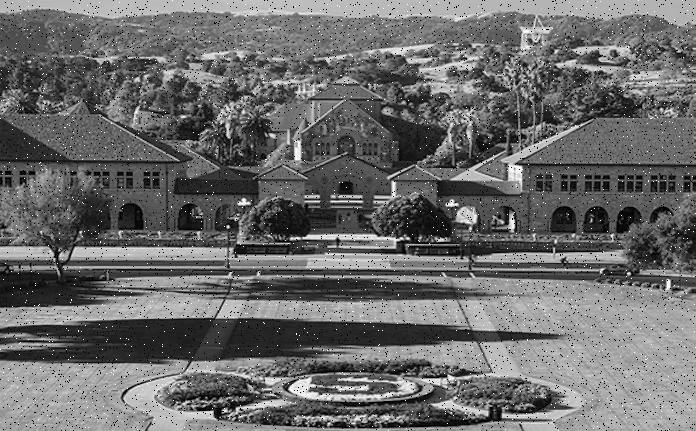

In [16]:
cv2_imshow(salt_pepper)

**Median Filtering**

In [17]:
row,col = salt_pepper.shape

In [18]:
img_new = np.zeros([row, col])

for i in range(1, row-1):
    for j in range(1, col-1):
        temp = [salt_pepper[i-1, j-1],
               salt_pepper[i-1, j],
               salt_pepper[i-1, j + 1],
               salt_pepper[i, j-1],
               salt_pepper[i, j],
               salt_pepper[i, j + 1],
               salt_pepper[i + 1, j-1],
               salt_pepper[i + 1, j],
               salt_pepper[i + 1, j + 1]]

        temp = sorted(temp)
        img_new[i, j]= temp[4]

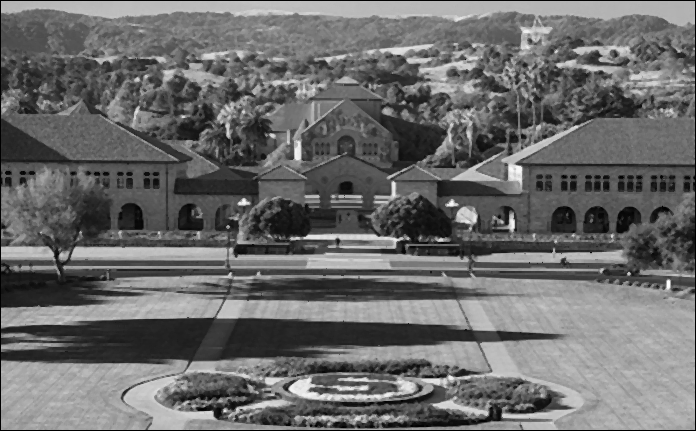

In [19]:
cv2_imshow(img_new)